In [1]:
import torch
from matplotlib import pyplot as plt
from models.cnp import CNP
from models.wta_cnp import WTA_CNP

In [2]:
root_path = "/home/yigit/projects/mbcnp/outputs/combined/old/large/"
run_id, model_folder = '1695830527', '/saved_models/'
models_path = f'{root_path}{run_id}{model_folder}'

cnp_model_path, wta_model_path = f'{models_path}cnp_on_synth.pt', f'{models_path}wta_on_synth.pt'

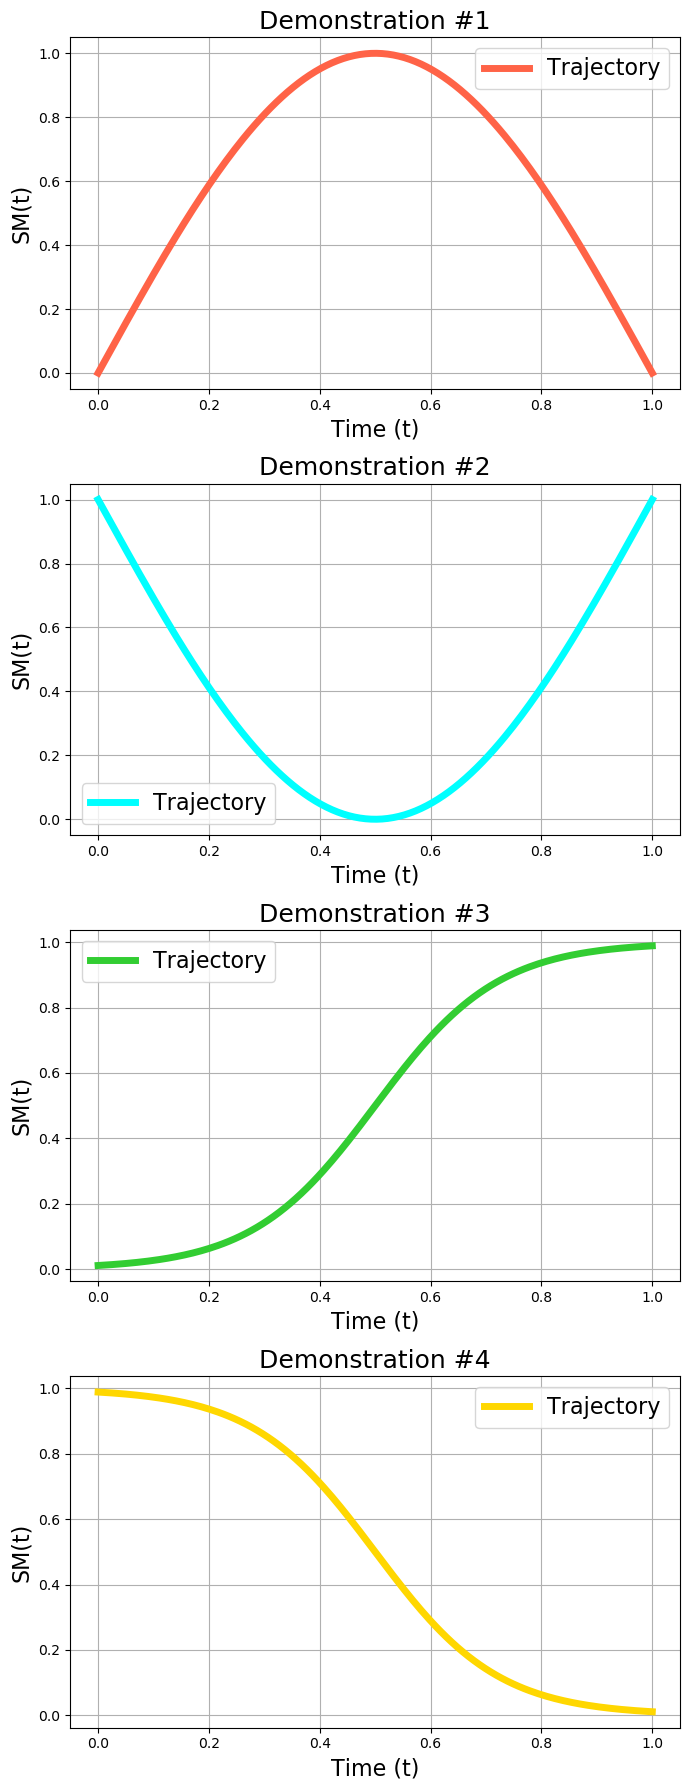

In [4]:
y = torch.load(f'{root_path}{run_id}/y.pt')
num_samples = y.shape[0]
# print(y.shape)

x = torch.linspace(0, 1, 200).repeat(num_samples, 1).view(num_samples, -1, 1)
colors = ['tomato', 'aqua', 'limegreen', 'gold', 'mediumslateblue', 'lightcoral', 'darkorange', 'teal']

test_ind = 99

plt_y_lim_up = torch.max(y) + 0.1
plt_y_lim_low = torch.min(y) - 0.1

# plt.figure(figsize=(8, 6))
# plt.ylim((plt_y_lim_low, plt_y_lim_up))
# for i in range(num_samples):
#     plt.plot(x[i, :, 0].cpu(), y[i, :, 0].cpu(), colors[i%num_samples], label="Trajectory {}".format(i+1))
#     plt.scatter(x[i, test_ind, 0], y[i, test_ind, 0], c='k')

# test_x = x[0, test_ind, 0].item()

# plt.plot([test_x]*200, torch.linspace(-1, 1, 200), 'k--', alpha=0.5)

# plt.legend()
# plt.grid(True)
# plt.xlabel('Time (t)')
# plt.ylabel('Sensorimotor Value (SM(t))')
# plt.title(f'Distinct Functions')


fig, axs = plt.subplots(num_samples, 1, figsize=(7, 18))
for i in range(num_samples):
    axs[i].plot(x[i, :, 0].cpu(), y[i, :, 0].cpu(), color=colors[i], linewidth=5, label="Trajectory")
    axs[i].grid(True)
    # axs[i].legend()

    axs[i].set_xlabel('Time (t)', fontsize=16)
    axs[i].set_ylabel('SM(t)', fontsize=16)
    axs[i].set_title(f'Demonstration #{i+1}', fontsize=18)
    axs[i].legend(loc='best', fontsize=16)

plt.tight_layout()
plt.savefig(f'{raw_data_path}data_{suffix}.png')
# plt.close()
plt.show()

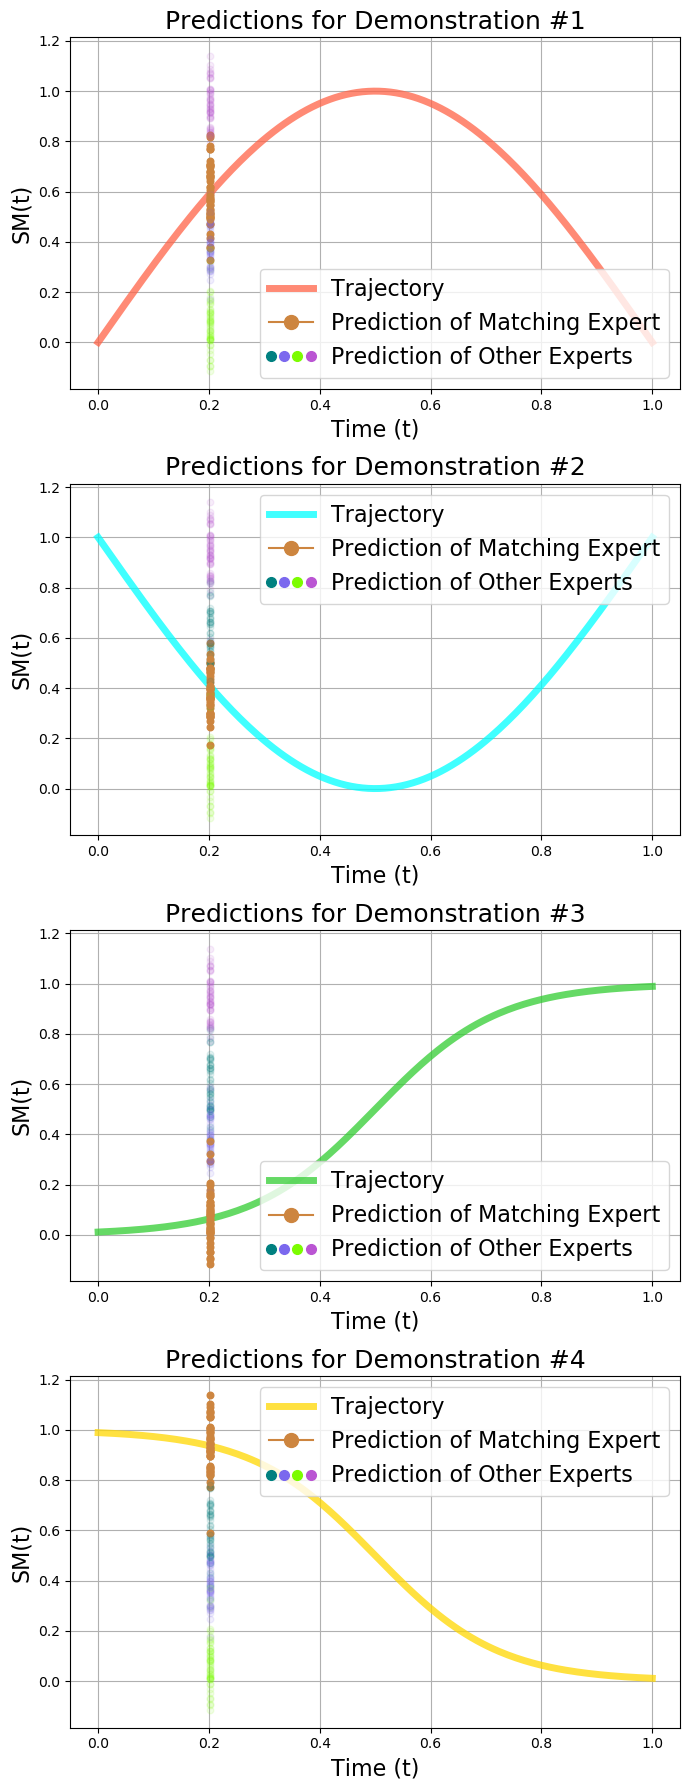

In [12]:
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

y = torch.load(f'{root_path}{run_id}/y.pt')
num_samples = y.shape[0]
# print(y.shape)

x = torch.linspace(0, 1, 200).repeat(num_samples, 1).view(num_samples, -1, 1)
colors = ['tomato', 'aqua', 'limegreen', 'gold', 'mediumslateblue', 'lightcoral', 'darkorange', 'teal']

test_ind = 40
n_samp = 50
pred_y0 = torch.distributions.Normal(y[0, test_ind, 0], torch.tensor([0.1])).sample([n_samp])
pred_y1 = torch.distributions.Normal(y[1, test_ind, 0], torch.tensor([0.1])).sample([n_samp])
pred_y2 = torch.distributions.Normal(y[2, test_ind, 0], torch.tensor([0.1])).sample([n_samp])
pred_y3 = torch.distributions.Normal(y[3, test_ind, 0], torch.tensor([0.1])).sample([n_samp])

plt_y_lim_up = torch.max(y) + 0.1
plt_y_lim_low = torch.min(y) - 0.1


fig, axs = plt.subplots(num_samples, 1, figsize=(7, 18))
for i in range(num_samples):

    for j in range(n_samp):
        axs[i].scatter(x[i, test_ind, 0], pred_y0[j], marker='.', s=90, color='peru' if i==0 else 'teal', alpha=0.99 if i==0 else 0.1, zorder=10)
        axs[i].scatter(x[i, test_ind, 0], pred_y1[j], marker='.', s=90, color='peru' if i==1 else 'mediumslateblue', alpha=0.99 if i==1 else 0.1, zorder=10)
        axs[i].scatter(x[i, test_ind, 0], pred_y2[j], marker='.', s=90, color='peru' if i==2 else 'lawngreen', alpha=0.99 if i==2 else 0.1, zorder=10)
        axs[i].scatter(x[i, test_ind, 0], pred_y3[j], marker='.', s=90, color='peru' if i==3 else 'mediumorchid', alpha=0.99 if i==3 else 0.1, zorder=10)

    axs[i].plot(x[i, :, 0].cpu(), y[i, :, 0].cpu(), color=colors[i], linewidth=5, label="Trajectory", alpha=0.75)
    axs[i].grid(True)

    handles, labels = axs[i].get_legend_handles_labels()
    handles.extend([Line2D([0], [0], marker='o', markerfacecolor='peru', markersize=10, alpha=1, color='peru')])
    labels.extend(['Prediction of Matching Expert', "Prediction of Other Experts"])


    # create another legend with multiple keys and one value

    others_handle = (Line2D([0], [0], marker='o', markerfacecolor='teal', markersize=7, alpha=1, color='teal'),
                      Line2D([0], [0], marker='o', markerfacecolor='mediumslateblue', markersize=7, alpha=1, color='mediumslateblue'),
                      Line2D([0], [0], marker='o', markerfacecolor='lawngreen', markersize=7, alpha=1, color='lawngreen'),
                      Line2D([0], [0], marker='o', markerfacecolor='mediumorchid', markersize=7, alpha=1, color='mediumorchid'))

    handles.extend([others_handle])


    axs[i].set_xlabel('Time (t)', fontsize=16)
    axs[i].set_ylabel('SM(t)', fontsize=16)
    axs[i].set_title(f'Predictions for Demonstration #{i+1}', fontsize=18)
    axs[i].legend(handles=handles, loc='best', fontsize=16, labels=labels, handler_map={tuple: HandlerTuple(ndivide=None)})

plt.tight_layout()
plt.show()

/tmp/ipykernel_6168/3031055640.py:32: UserWarning: Legend does not support <__main__.LineHandler object at 0x7f66676c2190> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(handles, labels)
/tmp/ipykernel_6168/3031055640.py:32: UserWarning: Legend does not support <__main__.LineHandler object at 0x7f666766d6d0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(handles, labels)


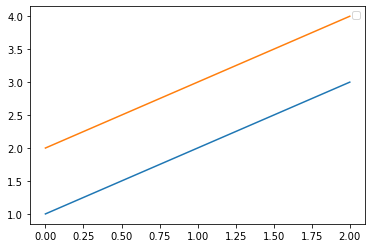

In [40]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

fig, ax = plt.subplots()

# Create some lines
line1, = ax.plot([1, 2, 3], label='Line 1')
line2, = ax.plot([2, 3, 4], label='Line 2')

# Create custom legend handlers for each line
class LineHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle, x0, y0, w, h):
        # Extract line properties from the original handle
        color = orig_handle.get_color()
        linestyle = orig_handle.get_linestyle()
        linewidth = orig_handle.get_linewidth()

        # Create two Line2D objects with different offsets
        x1 = x0 + w / 2
        y1 = y0 + h / 2

        artist1 = Line2D([x0, x1], [y1, y1], color=color, linestyle=linestyle, linewidth=linewidth)
        artist2 = Line2D([x1, x0 + w], [y0, y1], color=color, linestyle=linestyle, linewidth=linewidth)

        return [artist1, artist2]

# Create a tuple of handles with the custom legend handlers
handles = [LineHandler(line1), LineHandler(line2)]
labels = ['Line 1', 'Line 2']

# Add the entry to the legend
ax.legend(handles, labels)

plt.show()


In [71]:
# obs = torch.Tensor([1.0, 0.0]).unsqueeze(0).unsqueeze(0)
obs = torch.zeros(num_samples, 1, 2)
for i in range(num_samples):
    obs[i, 0, 0] = x[i, test_ind, 0]
    obs[i, 0, 1] = y[i, test_ind, 0]
tar = torch.linspace(0, 1, 200).unsqueeze(0).unsqueeze(-1).repeat(num_samples, 1, 1)

# print(obs.shape, tar.shape)

with torch.no_grad():
    pred_cnp, _ = cnp(obs, tar)
    pred_wta, gate = wta(obs, tar)

print(obs)
print(pred_wta.shape, pred_cnp.shape, gate.shape)
print(gate)

tensor([[[4.9749e-01, 9.9997e-01]],

        [[4.9749e-01, 3.1173e-05]],

        [[4.9749e-01, 4.9435e-01]],

        [[4.9749e-01, 5.0565e-01]]])
torch.Size([4, 4, 200, 2]) torch.Size([4, 200, 2]) torch.Size([4, 1, 4])
tensor([[[1.0000e+00, 1.5262e-06, 2.9241e-08, 9.3615e-09]],

        [[4.0792e-11, 1.2655e-08, 7.0256e-08, 1.0000e+00]],

        [[9.7612e-06, 7.6063e-01, 2.3904e-01, 3.1461e-04]],

        [[1.0027e-05, 6.7679e-01, 3.2290e-01, 2.9341e-04]]])


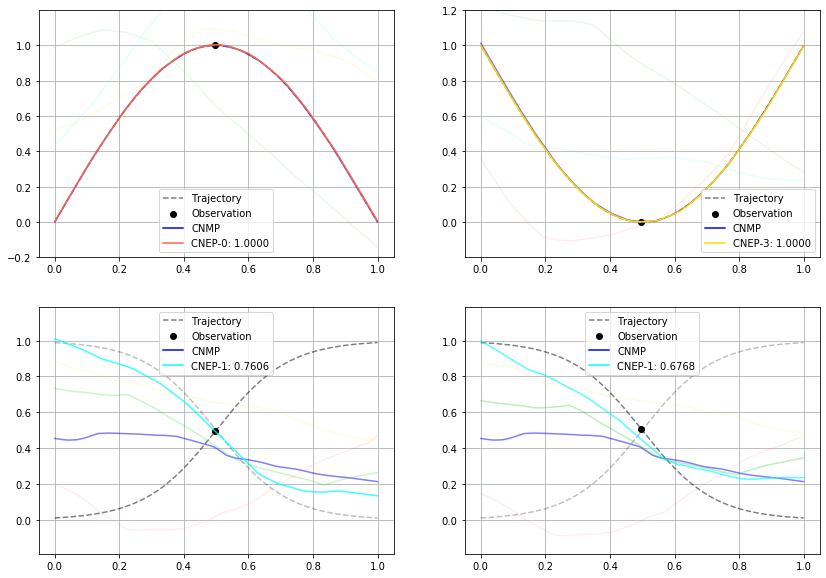

In [72]:
from matplotlib.lines import Line2D

rows, cols = torch.ceil(torch.sqrt(torch.tensor(batch_size))).int(), torch.floor(torch.sqrt(torch.tensor(batch_size))).int()
rows, cols = rows.item(), cols.item()
fig, axs = plt.subplots(rows, cols, figsize=(14, 10))
for i in range(rows):
    for j in range(cols):
        ind = i*cols+j
        plt_y_upper_lim, plt_y_lower_lim = torch.max(y[ind]) + 0.2, torch.min(y[ind]) - 0.2

        axs[i, j].scatter(x[ind, test_ind, 0], y[ind, test_ind, 0], label='Observation', c='k')
        axs[i, j].set_ylim((plt_y_lower_lim, plt_y_upper_lim))
        axs[i, j].plot(torch.linspace(0, 1, 200), y[ind], 'k--', alpha=0.5, label='Trajectory')  # data
        if ind == 2:
            axs[i, j].plot(torch.linspace(0, 1, 200), y[3], 'k--', alpha=0.25)  # data
        if ind == 3:
            axs[i, j].plot(torch.linspace(0, 1, 200), y[2], 'k--', alpha=0.25)  # data
        # axs[i, j].plot(torch.linspace(0, 1, 200), y[3-ind], 'k--', alpha=0.25)  # data
        axs[i, j].plot(torch.linspace(0, 1, 200), pred_cnp[ind,:,0], 'b', alpha=0.5)  # cnp predictions

        handles = axs[i, j].get_legend_handles_labels()[0]
        handles.extend([Line2D([0], [0], label='CNMP', color='b')])

        best = torch.argmax(gate[ind, 0, :]).item()
        for k in range(gate.shape[-1]):
            axs[i, j].plot(torch.linspace(0, 1, 200), pred_wta[k,ind,:,0], colors[k%batch_size], alpha=max(0.1, gate[ind, 0, k].item()))  # wta predictions
            if k==best:
                handles.extend([Line2D([0], [0], label=f'CNEP-{k}: {gate[ind, 0, k].item():.4f}', color=colors[k])])

        axs[i, j].legend(handles=handles, loc='best')
        axs[i, j].grid(True)
        

In [27]:
rr = torch.cat((torch.cat((torch.tensor(y[0, 80, :]), torch.tensor(y[0, 120, :])), dim=0).unsqueeze(0), torch.cat((torch.tensor(y[1, 80, :]), torch.tensor(y[1, 120, :])), dim=0).unsqueeze(0)), dim=0).unsqueeze(-1)
# print(rr.shape)  # 2-2-1
wta.loss(pred_wta, gate.squeeze(1), rr)

/tmp/ipykernel_8279/1920264534.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rr = torch.cat((torch.cat((torch.tensor(y[0, 80, :]), torch.tensor(y[0, 120, :])), dim=0).unsqueeze(0), torch.cat((torch.tensor(y[1, 80, :]), torch.tensor(y[1, 120, :])), dim=0).unsqueeze(0)), dim=0).unsqueeze(-1)


(tensor(-44.9983), tensor(-4.7696))

In [7]:
# plt.ylim((-2.5, 2.5))

# plt.errorbar(torch.linspace(0, 1, 200), pred_cnp[0,:,0], yerr=pred_cnp[0,:,1])
# plt.plot(torch.linspace(0, 1, 200), pred_wta[1,0,:,0], 'k')

In [8]:
# plt.ylim((-2.5, 2.5))
# ind = 0
# plt.errorbar(torch.linspace(0, 1, 200), pred_wta[ind,0,:,0], yerr=pred_wta[ind,0,:,1])